In [8]:
from IPython.display import Image

These examples are again taken from Chapter 1 of Applied Mathematics, by J. David Logan

# Lecture 3: Scaling
Another procedure that is important for understanding the behaviour of
mathematical models, and simplifying them, is that of scaling. It is
essential when attempting to understand which terms in an equation (e.g. a
differential equation) are negligible compared with others. Scaling also
tends to reduce the number of parameters in a problem, leading to
simplification.

Consider the problem of the propagation of an electrical signal along the
walls of an artery. On the one hand, the signal is transmitted from cell to
cell, by pumping ions in and out of cells, a process that occurs on the
micrometer scale. But on the other, the propagation is slow and observable
on the scale of centimetres. This problem has multiple scales, and we want
our spatial variable to capture the phenomenon we are interested in. We
tend to want our variables to be of \emph{order unity}, this means that
they are not really small or large, so we choose a \emph{characteristic
scale} and construct a new dimensionless variable. For example, to study
the spatial dynamics within a handful of cells, we might choose a
characteristic scale $x_c$ of a few hundred microns, and rescale $x$ (in m)
to a new dimensionless variable $\bar{x}$
\begin{equation}
  \bar{x} = \frac{x}{x_c}
\end{equation}
We do this for all of the variables (e.g. $t$, etc.). This process is
called *non-dimensionalisation*. This is easiest to understand with
reference to an example:

## Population growth
Let $p = p(t)$ be the population of some animal species in a fixed region over time. The simplest model of population growth comes from the assumption that each individual has a fixed probability of reproducing in any given time step. We assume that our $p$ is well approximated by a continuous variable, and our assumption leads to a fixed growth rate $r > 0$ and corresponding governing differential equation
\begin{equation}
  \frac{dp}{dt} = rp
\end{equation}
This equation (the *Malthus model*) has the solution $p(t) = p_0e^{rt}$, and is clearly unrealistic, as eventually constraints on habitat and resources will cause the growth to slow. The simplest modification to the model assumes that interractions with other individuals is a good proxy for competition for resources, and that the number of interactions is proportional to $p^2$ (under some assumptions). So we subtract a term proportional to $p^2$:
\begin{equation}
  \frac{dp}{dt} = rp\left(1 - \frac{p}{K}\right), \quad p(0) = p_0
\end{equation}
$K$ is the \emph{carrying capacity}, $\frac{dp}{dt} = 0$ when $p = k$, and exceeding $K$ will cause a negative growth rate.

The right hand side function is displayed below:

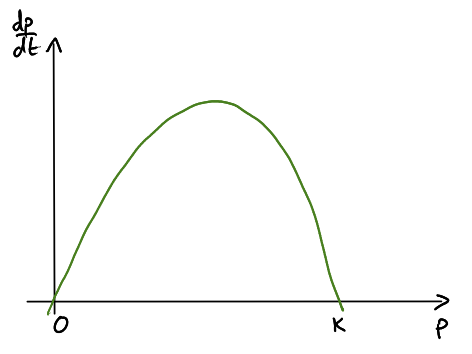

In [12]:
Image(filename='logistic.png') 

So, how do we choose a characteristic scale for time and population? Well, we form these from the constants in the problem, $r$, $K$, and $p_0$. Only $r$ contains the dimension of time, so we rescale time to form the dimensionless time $\tau$:
\begin{equation*}
  \tau = rt.
\end{equation*}
Our other constants in the problem, $p_0$ and $K$ have dimensions of population number, so either can be chosen to rescale the population. We'll choose $K$ and define our new dimensionless population $P$ as
\begin{equation*}
  P = \frac{p}{K}
\end{equation*}
Substituting in, we get
\begin{align*}
  (Kr)\frac{dP}{d\tau} &= rKP(1 - P) \\
  \frac{dP}{d\tau} &= P(1 - P), \quad P(0) = \alpha
\end{align*}
where $\alpha = \frac{p_0}{K}$.  Note how our rescaled problem has only one parameter $\alpha$, all of the other parameters have disappeared from the problem, if we solve this problem for $P$ and $\tau$, we can get our original solution by reversing the scaling. This problem can be solved (separation of variables) to give 
\begin{equation*}
  P(\tau) = \frac{\alpha}{\alpha + (1 - \alpha)e^{-\tau}}
\end{equation*}
and $\lim_{\tau \to \infty} P(\tau) = 1$, *i.e.* $p \to K$ as $t \to \infty$.



## Chemical Reactor problem
Consider now the problem of modelling a chemical reaction that occurs within a continously stirred tank. Continuously stirred, or well-mixed, means that the concentration is kept constant throughout the tank. The chemical comes into the tank at concentration $c_i$, specified as mass per volume, and leaves at concentration $c(t)$. The flow in and out of the tank are assumed to be equal. The tank is depicted below:


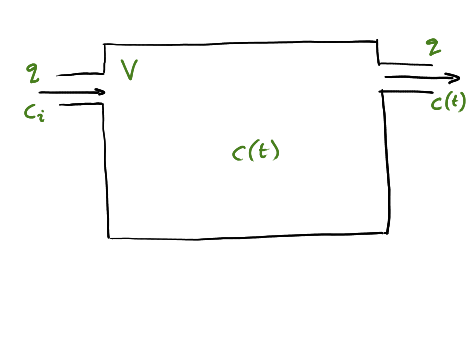

In [13]:
Image("chemicalreaction.png")

We assume that the chemical reaction occurs according to the law of mass action, *i.e.* $r = kc$ where the reaction rate $r$ has dimensions of mass per unit volume per unit time, and $k$ of inverse time.

Then, by conservation of mass,
\begin{align}
    \frac{d}{dt}(Vc(t)) &= qc_i - qc(t) - Vkc(t) \nonumber \\
    \frac{dc}{dt} &= \frac{q}{V}(c_i - c) - kc, \quad t > 0 \\
    c(0) &= c_0.
\end{align}

To nondimensionalise this, we need to choose dimensionless independent and dependent variables. So we need a characteristic concentration and time, usually formed from the constants in the problem, $c_i, c_0, V, q, k$. In our case, either $c_i$ or $c_0$ will do for the concentration, and to form a time scale we can either choose characteristic time $T = \frac{1}{k}$ or $T = \frac{V}{q}$. We won't make this choice yet, and just leave it as $T$. So, 
\begin{align*}
    C &= \frac{c}{c_i} & \tau = \frac{t}{T}.
\end{align*}
Noting that
\begin{equation*}
    \frac{dc}{dt} = \frac{c_i}{T}\frac{dC}{d\tau},
\end{equation*}
We now have the dimensionless model
\begin{align*}
    \frac{dC}{d\tau} &= \frac{qT}{V}(1 - C) - kTC, \quad \tau > 0,\\
    C(0) &= \gamma,
\end{align*}
where $\gamma = \frac{c_0}{c_i}$. Notice that if we choose the timescale $T = V/q$, then our model becomes
\begin{align}
    \frac{dC}{d\tau} &= 1 - C - \beta C, \quad \tau > 0,  \\
    C(0) &= \gamma \nonumber
\end{align}
where $\displaystyle \beta = \frac{kV}{q}$, whereas if we choose $T = 1/k$, we get
\begin{align}
    \frac{dC}{d\tau} &= \frac{1}{\beta}(1 - C) - C, \quad \tau > 0, \\
    C(0) &= \gamma \nonumber
  \end{align}

So, why would we choose one of these systems over the other? Essentially, it depends on the relative magnitude of the terms. For example, if the reaction was slow compared with the the flow through the reactor. This would somehow mean that $k$ is small compared with the flow rate $q/V$. So we would write $k \ll q/V$, or alternatively $V/q \ll k$. So our dimensionless parameter $\beta$ is small, or $\beta \ll 1$. So in this case, we should scale time according to the flow rate, i.e. use the first scaling. Things that happen at nondimensional times of order 1 are happening in real world times of order $V/q$, i.e. on a very short timescale.

Conversely, if the reaction is fast compared with the flow rate, then $\beta \gg 1$, and we should scale time with the reaction time scale, putting the small parameter $1/\beta$ correctly on the flow rate term.

Sometimes we might want to approximate our problem by deleting small terms in the equation. This is a pretty common thing to want to do, as it can give equations that are analytically solvable from nonlinear ones. For example, if $\beta \ll 1$, we can drop the small term off our first rescaling, giving
\begin{align*}
    \frac{dC}{d\tau} &= 1 - C, \quad C(0) = \gamma
\end{align*}
This is analytically solvable to give $C(\tau) = 1 + (\gamma - 1)e^{-\tau}$. This is believable, the concentration over time approaches the concentration of the feed.

On the other hand, we would have
\begin{align*}
    \beta \frac{dC}{d\tau} = (1 - C) - \beta C
\end{align*}
  If we used this nondimensionalisation by accident, then dropping off the
  $\beta$ terms would give us the approximation $C = 1$, which does not
  satisfy the initial conditions. So we need to be careful!